In [ ]:
from keras.datasets import cifar100
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import scale, StandardScaler 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core.flatten import Flatten
from tensorflow.keras.optimizers import SGD
from keras.saving.save import load_model
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
(X_train,y_train),(X_test,y_test)=cifar100.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

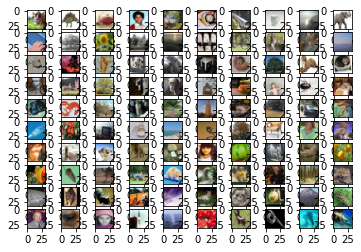

In [ ]:
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(X_train[i])
plt.show()

In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [ ]:
X_train/=255
X_test/=255

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train=to_categorical(y_train,100)
y_test=to_categorical(y_test,100)

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))


In [ ]:
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))

In [ ]:
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(100,activation='softmax'))

In [ ]:
opt=SGD(lr=0.01,momentum=0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=100,batch_size=64,validation_data=(X_test,y_test),verbose=1)

Epoch 1/100
782/782 [==============================] - 10s 13ms/step - loss: 3.9591 - accuracy: 0.0971 - val_loss: 3.4545 - val_accuracy: 0.1743
Epoch 2/100
782/782 [==============================] - 9s 12ms/step - loss: 3.1866 - accuracy: 0.2222 - val_loss: 2.9679 - val_accuracy: 0.2705
Epoch 3/100
782/782 [==============================] - 9s 12ms/step - loss: 2.6909 - accuracy: 0.3196 - val_loss: 2.6701 - val_accuracy: 0.3271
Epoch 4/100
782/782 [==============================] - 9s 12ms/step - loss: 2.2603 - accuracy: 0.4099 - val_loss: 2.5692 - val_accuracy: 0.3558
Epoch 5/100
782/782 [==============================] - 9s 12ms/step - loss: 1.8061 - accuracy: 0.5125 - val_loss: 2.7213 - val_accuracy: 0.3537
Epoch 6/100
782/782 [==============================] - 9s 12ms/step - loss: 1.3122 - accuracy: 0.6315 - val_loss: 3.2872 - val_accuracy: 0.3311
Epoch 7/100
782/782 [==============================] - 10s 13ms/step - loss: 0.8625 - accuracy: 0.7440 - val_loss: 3.6458 - val_accurac

In [ ]:
model.save('cifar100_2.h5')

In [ ]:
model15=load_model('cifar100_2.h5')

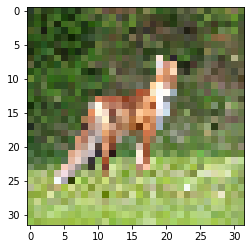

In [ ]:
img=load_img('fox1.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([65])

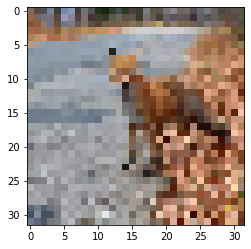

In [ ]:
img=load_img('fox2.jfif',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([88])

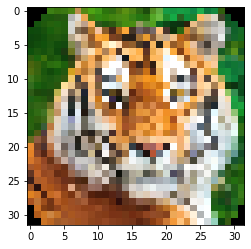

In [ ]:
img=load_img('tiger.png',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([88])

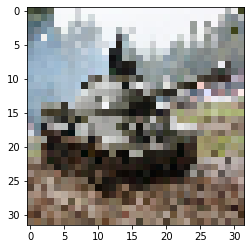

In [ ]:
img=load_img('tank1.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([85])

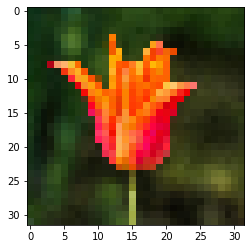

In [ ]:
img=load_img('tulip1.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([8])

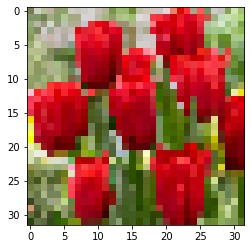

In [ ]:
img=load_img('tulip2.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([83])

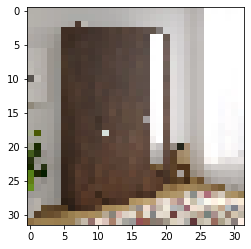

In [ ]:
img=load_img('wardbode1.webp',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([59])

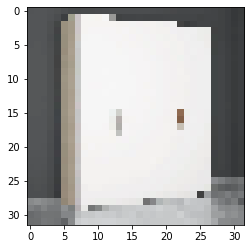

In [ ]:
img=load_img('wardbode2.webp',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([28])

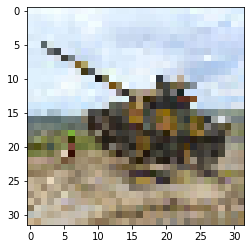

In [ ]:
img=load_img('tank2.jfif',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([85])

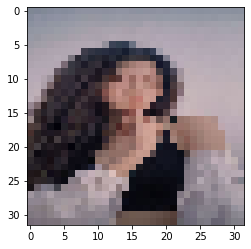

In [ ]:
img=load_img('girl1.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([35])

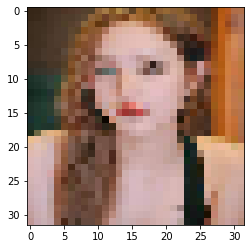

In [ ]:
img=load_img('girl2.jfif',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([79])

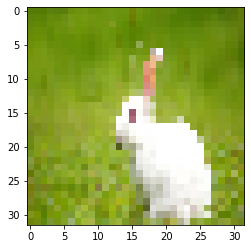

In [ ]:
img=load_img('rabbit1.webp',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([18])

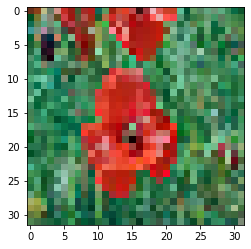

In [ ]:
img=load_img('poppies.jfif',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([92])

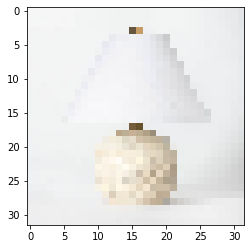

In [ ]:
img=load_img('lamp1.jfif',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([41])

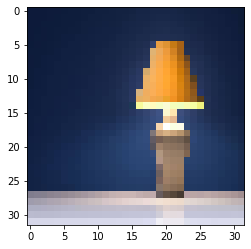

In [ ]:
img=load_img('lamp2.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([86])

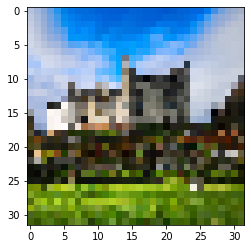

In [ ]:
img=load_img('castle2.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([85])

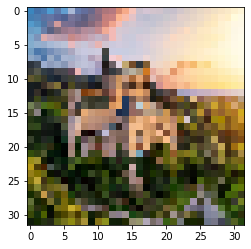

In [ ]:
img=load_img('castle1.webp',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([44])

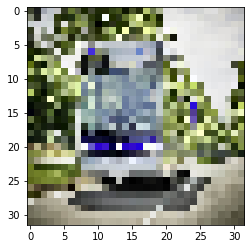

In [ ]:
img=load_img('bus.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([41])

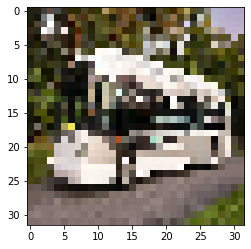

In [ ]:
img=load_img('bus2.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([89])

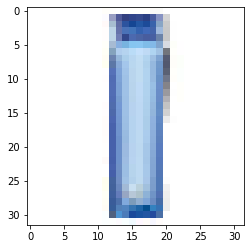

In [ ]:
img=load_img('bottle.jfif',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([16])

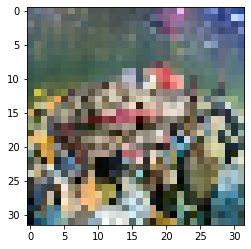

In [ ]:
img=load_img('trout1.jfif',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([35])

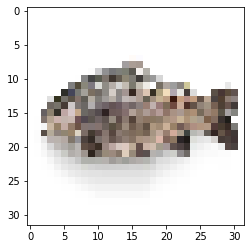

In [ ]:
img=load_img('trout2.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([17])

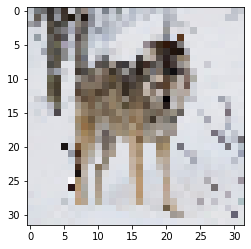

In [ ]:
img=load_img('wolf.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([86])

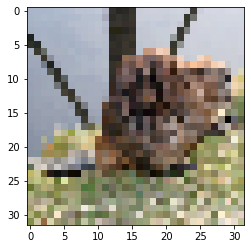

In [ ]:
img=load_img('beaver1.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([33])

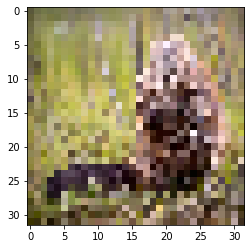

In [ ]:
img=load_img('beaver2.webp',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([78])

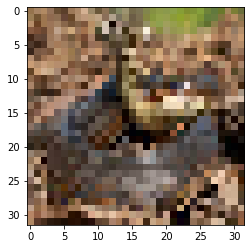

In [ ]:
img=load_img('snake.jfif',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([78])

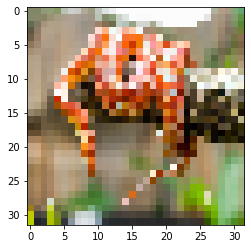

In [ ]:
img=load_img('snake2.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([89])

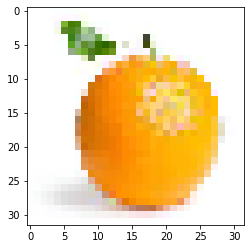

In [ ]:
img=load_img('orange1.jfif',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([53])

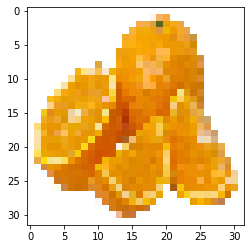

In [ ]:
img=load_img('orange2.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([57])

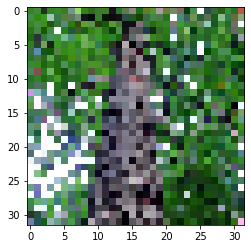

In [ ]:
img=load_img('oak2.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([92])

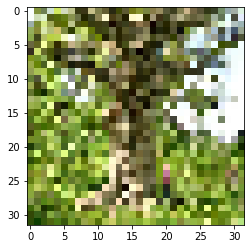

In [ ]:
img=load_img('oak1.jpg',target_size=(32,32))
plt.imshow(img)

In [ ]:
img=img_to_array(img)
img = img.reshape(1,32,32,3)
img=img.astype('float32')
img=img/255
np.argmax(model15.predict(img),axis=1)

array([89])